In [1]:
# Change working directory to project root
import os
os.chdir('C:\\Users\\Alex\\PycharmProjects\\4YP\\')
os.getcwd()

'C:\\Users\\Alex\\PycharmProjects\\4YP'

In [2]:
from scripts import TrainMLP, AdamConfig, SGDConfig, ISRUCConfig, SHHSConfig_f
from utils import accuracy_metrics
from visualisation import plot_losses
from src.models import MLP1
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Function to plot confusion matrix
def plot_norm_confusion(confusion, title):
    # Normalise the confusion by row
    print(confusion)
    norm_confusion = confusion / (np.sum(confusion, axis=1).reshape(len(confusion),1))

    fig, ax = plt.subplots()
    plt.imshow(norm_confusion)

    ticks = ['N3','N1/N2','REM','W']

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticks(np.arange(len(ticks)), ticks)
    ax.set_yticks(np.arange(len(ticks)), ticks)

    # Loop over data dimensions and create text annotations.
    for i in range(len(ticks)):
        for j in range(len(ticks)):
            text = ax.text(j, i, np.round(norm_confusion[i, j], decimals=2),
                           ha="center", va="center", color="w")

    ax.set_title(title)

In [10]:
# Compare training using SGD and Adam


patients = {"train": [1, 2, 3, 4, 5, 6, 7],
            "val":   [8, 9],
            "test":  [10]}

configs = [SGDConfig(lr=0.1, momentum=0.5), AdamConfig()]

sgd_mlp_trainer = TrainMLP(patients=patients, model=MLP1, optimiser_config=configs[0])
sgd_mlp_trainer.train(n_epochs=50)
sgd_mlp_trainer.save_best_model()
sgd_mlp_trainer.evaluate_accuracy()

adam_mlp_trainer = TrainMLP(patients=patients, model=MLP1, optimiser_config=configs[1])
adam_mlp_trainer.train(n_epochs=50)
adam_mlp_trainer.save_best_model()
adam_mlp_trainer.evaluate_accuracy()






C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Epoch: [0/50], Average Training Loss: [1.3969746165805392]
Epoch: [0/50], Validation Loss: [1.3791085289370628], Validation Accuracy: [0.12190860215053764]
Epoch: [1/50], Average Training Loss: [1.0103803458269576]
Epoch: [1/50], Validation Loss: [1.025949713203215], Validation Accuracy: [0.609375]
Epoch: [2/50], Average Training Loss: [0.7828666248865295]
Epoch: [2/50], Validation Loss: [0.7772776301830046], Validation Accuracy: [0.6963373655913978]
Epoch: [3/50], Average Training Loss: [0.7197833573609068]
Epoch: [3/50], Validation Loss: [0.7462740012354427], Validation Accuracy: [0.7003696236559139]
Epoch: [4/50], Average Training Loss: [0.6882791067773139]
Epoch: [4/50], Validation Loss: [0.785512680668504], Validation Accuracy: [0.6786962365591398]
Epoch: [5/50], Average Training Loss: [0.6809297294644584]
Epoch: [5/50], Validation Loss: [0.7483532644147354], Validation Accuracy: [0.7003024193548387]
Epoch: [6/50], Average Training Loss: [0.6460219715770922]
Epoch: [6/50], Validat

C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Epoch: [0/50], Average Training Loss: [1.34402574921212]
Epoch: [0/50], Validation Loss: [1.3167381325075704], Validation Accuracy: [0.29240591397849464]
Epoch: [1/50], Average Training Loss: [1.1597189122473288]
Epoch: [1/50], Validation Loss: [1.148120008168682], Validation Accuracy: [0.4576612903225806]
Epoch: [2/50], Average Training Loss: [1.040220102022963]
Epoch: [2/50], Validation Loss: [1.0214118361473083], Validation Accuracy: [0.6275201612903226]
Epoch: [3/50], Average Training Loss: [0.9319493355806808]
Epoch: [3/50], Validation Loss: [0.9138961842944545], Validation Accuracy: [0.6537298387096774]
Epoch: [4/50], Average Training Loss: [0.8571346426567836]
Epoch: [4/50], Validation Loss: [0.8380051894534019], Validation Accuracy: [0.6709341397849463]
Epoch: [5/50], Average Training Loss: [0.8075793639958253]
Epoch: [5/50], Validation Loss: [0.7984010956941112], Validation Accuracy: [0.6811491935483871]
Epoch: [6/50], Average Training Loss: [0.771427405507941]
Epoch: [6/50], 

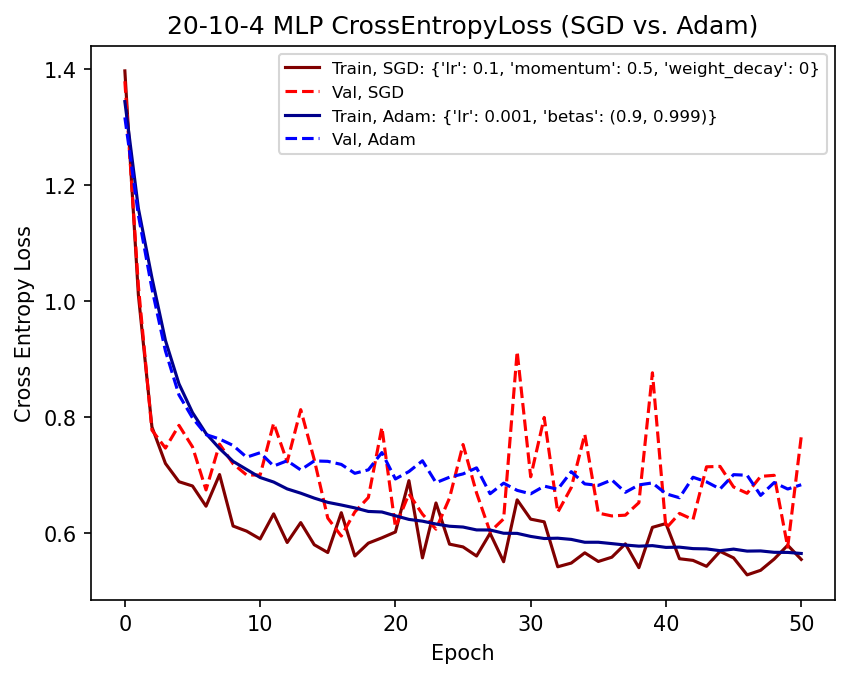

In [18]:
# Compare loss plots for different optimisers
fig, ax = plt.subplots()
t_colours=['maroon','darkblue']
v_colours=['r','b']

sgd_labels = {"t": f"Train, SGD: {sgd_mlp_trainer.optimiser_config.params}",
             "v": "Val, SGD"}
adam_labels = {"t": f"Train, Adam: {adam_mlp_trainer.optimiser_config.params}",
              "v": "Val, Adam"}
sgd_mlp_trainer.plot_loss(ax=ax, t_colour=t_colours[0], v_colour=v_colours[0], labels=sgd_labels)
adam_mlp_trainer.plot_loss(ax=ax, t_colour=t_colours[1], v_colour=v_colours[1], labels=adam_labels)

ax.set_title('20-10-4 MLP CrossEntropyLoss (SGD vs. Adam)')



fig.dpi=150
plt.show()

[[ 93.  19.   0.   0.]
 [ 10. 298.  19.  75.]
 [  4. 125.   6.   0.]
 [  7.   7.   1. 131.]]


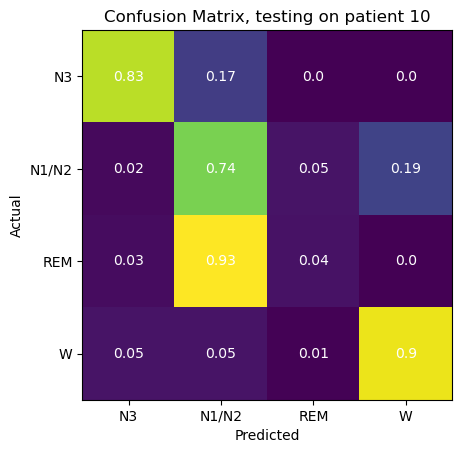

In [44]:
import numpy as np
# Visualise confusion matrix
trainer = adam_mlp_trainer
confusion = trainer.confusion



    
title=('Confusion Matrix, testing on patient 10')
plot_norm_confusion(confusion, title)


{'train': [2, 3, 4, 5, 6, 7], 'val': [9, 10], 'test': [1]}


C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Confusion matrix: 
[[123.  45.   0.   0.]
 [ 27. 414.   5.  19.]
 [  0.  98.   6.   2.]
 [  0.   9.   1. 128.]]
Accuracy: [0.91790194 0.76852908 0.87913341 0.96465222]
Sensitivity: [0.73214286 0.89032258 0.05660377 0.92753623]
Specificity: [0.96191819 0.63106796 0.9922179  0.97158322]
{'train': [3, 4, 5, 6, 7, 8], 'val': [10, 1], 'test': [2]}


C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Confusion matrix: 
[[175.  14.   0.   0.]
 [ 84. 295.  19.   5.]
 [ 17. 102.  31.   2.]
 [  1.  12.   3.  70.]]
Accuracy: [0.86024096 0.71566265 0.82771084 0.97228916]
Sensitivity: [0.92592593 0.73200993 0.20394737 0.81395349]
Specificity: [0.84087363 0.70023419 0.96755162 0.9905914 ]
{'train': [4, 5, 6, 7, 8, 9], 'val': [1, 2], 'test': [3]}


C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Confusion matrix: 
[[168. 114.   0.   1.]
 [  1. 246.   1.  30.]
 [  2.  84.   2.  12.]
 [  0.   8.   0.  67.]]
Accuracy: [0.83967391 0.67663043 0.86548913 0.93070652]
Sensitivity: [0.59363958 0.88489209 0.02       0.89333333]
Specificity: [0.99337748 0.55021834 0.99842767 0.93494705]
{'train': [5, 6, 7, 8, 9, 10], 'val': [2, 3], 'test': [4]}


C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Confusion matrix: 
[[ 85.  54.   0.   0.]
 [  8. 284.   6.  18.]
 [  0.  83.   0.   2.]
 [  0.  17.   1. 135.]]
Accuracy: [0.91053391 0.73160173 0.86724387 0.94516595]
Sensitivity: [0.61151079 0.89873418 0.         0.88235294]
Specificity: [0.98555957 0.59151194 0.98848684 0.96296296]
{'train': [6, 7, 8, 9, 10, 1], 'val': [3, 4], 'test': [5]}


C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)
C:\Users\Alex\PycharmProjects\4YP\utils\accuracy_metrics.py:16: RuntimeWarning: invalid value encountered in divide
  PPV = TP / (TP + FP)
C:\Users\Alex\PycharmProjects\4YP\utils\accuracy_metrics.py:24: RuntimeWarning: invalid value encountered in divide
  FDR = FP / (TP + FP)
C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Confusion matrix: 
[[ 91.  53.   0.   0.]
 [  4. 298.   0.  22.]
 [  4.  62.   0.  12.]
 [  2.  33.   0. 240.]]
Accuracy: [0.92326431 0.78806334 0.90499391 0.91595615]
Sensitivity: [0.63194444 0.91975309 0.         0.87272727]
Specificity: [0.98522895 0.70221328 1.         0.93772894]
{'train': [7, 8, 9, 10, 1, 2], 'val': [4, 5], 'test': [6]}
Confusion matrix: 
[[198.  15.   0.   1.]
 [ 36. 304.   3.  51.]
 [  0.  76.   4.  13.]
 [  0.   5.   0.  61.]]
Accuracy: [0.93220339 0.75749674 0.88005215 0.90873533]
Sensitivity: [0.92523364 0.7715736  0.04301075 0.92424242]
Specificity: [0.93490054 0.74262735 0.99554896 0.90727532]
{'train': [8, 9, 10, 1, 2, 3], 'val': [5, 6], 'test': [7]}


C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Confusion matrix: 
[[188.  34.   0.   1.]
 [ 38. 118.  58.   3.]
 [  1.  42.  45.   0.]
 [  0.  27.  11. 160.]]
Accuracy: [0.89807163 0.72176309 0.84573003 0.94214876]
Sensitivity: [0.84304933 0.5437788  0.51136364 0.80808081]
Specificity: [0.92246521 0.79764244 0.89184953 0.99242424]
{'train': [9, 10, 1, 2, 3, 4], 'val': [6, 7], 'test': [8]}


C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Confusion matrix: 
[[ 99.  43.   0.   1.]
 [  6. 300.   1.  12.]
 [  1. 149.  10.   1.]
 [  0.  35.   0. 341.]]
Accuracy: [0.94894895 0.75375375 0.84784785 0.95095095]
Sensitivity: [0.69230769 0.94043887 0.0621118  0.90691489]
Specificity: [0.99182243 0.66617647 0.99880668 0.97752809]
{'train': [10, 1, 2, 3, 4, 5], 'val': [7, 8], 'test': [9]}


C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Confusion matrix: 
[[223.   2.   0.   0.]
 [234. 253.  37.   8.]
 [ 14.  31.  18.   0.]
 [  7.  51.   2.  88.]]
Accuracy: [0.73450413 0.625      0.91322314 0.92975207]
Sensitivity: [0.99111111 0.47556391 0.28571429 0.59459459]
Specificity: [0.65679677 0.80733945 0.95690608 0.9902439 ]
{'train': [1, 2, 3, 4, 5, 6], 'val': [8, 9], 'test': [10]}


C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Confusion matrix: 
[[ 94.  18.   0.   0.]
 [ 14. 291.  18.  79.]
 [  8. 118.   9.   0.]
 [  7.   8.   1. 130.]]
Accuracy: [0.9408805  0.67924528 0.81761006 0.88050314]
Sensitivity: [0.83928571 0.7238806  0.06666667 0.89041096]
Specificity: [0.95754026 0.63358779 0.97121212 0.87827427]


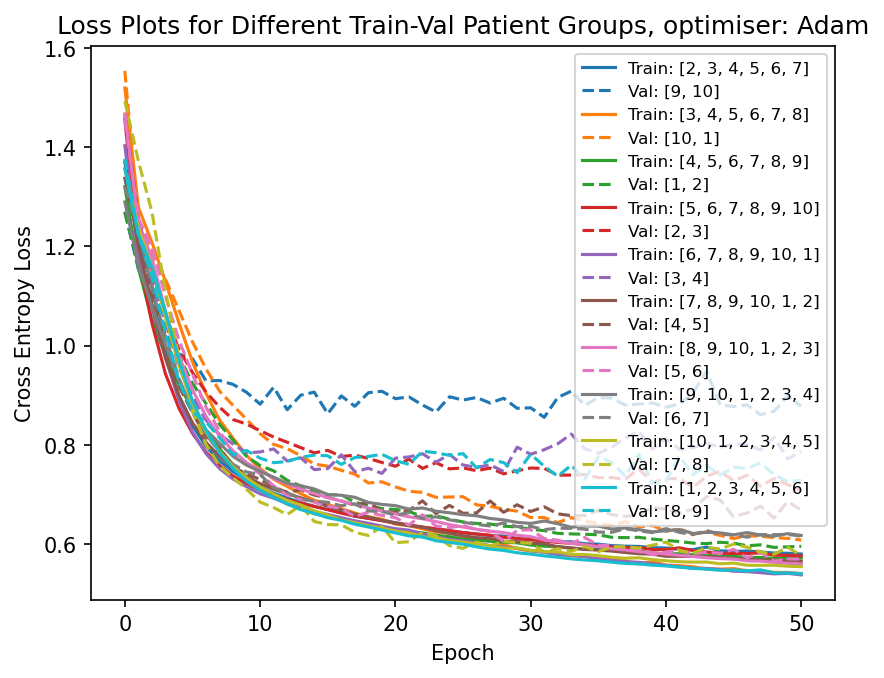

In [41]:
from scripts import TrainMLP, AdamConfig, SGDConfig
from src.models import MLP1
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

p = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

config = AdamConfig()
colors = cycle(plt.cm.tab10.colors)  # 10 distinct colors

fig, ax = plt.subplots()

confusions=[]

for test_patient in range(len(p)):
    color = next(colors)
    # Wrap-around for training patients
    train_start = (test_patient - 9) % len(p)
    train_end = (test_patient - 3) % len(p)
    if train_start < train_end:
        train_patients = list(p[train_start:train_end])
    else:
        train_patients = list(p[train_start:]) + list(p[:train_end])

    # Wrap-around for validation patients
    val_start = (test_patient - 2) % len(p)
    val_end = test_patient % len(p)
    if val_start < val_end:
        val_patients = list(p[val_start:val_end])
    else:
        val_patients = list(p[val_start:]) + list(p[:val_end])

    test_patients = [p[test_patient]]

    patients = {"train": train_patients, "val": val_patients, "test": test_patients}
    print(patients)

    mlp_trainer = TrainMLP(patients=patients, optimiser_config=config, model=MLP1)
    mlp_trainer.train(n_epochs=50, print_losses=False)
    labels={"t": f'Train: {train_patients}',
            "v": f'Val: {val_patients}'}
    mlp_trainer.plot_loss(ax=ax, t_colour=color, v_colour=color, labels=labels)
    mlp_trainer.evaluate_accuracy()
    confusions.append(mlp_trainer.confusion)

ax.set_title(f'Loss Plots for Different Train-Val Patient Groups, optimiser: {mlp_trainer.optimiser.__class__.__name__}')
fig.dpi=150
plt.show()

[[ 91.  53.   0.   0.]
 [  4. 298.   0.  22.]
 [  4.  62.   0.  12.]
 [  2.  33.   0. 240.]]


C:\Users\Alex\PycharmProjects\4YP\utils\accuracy_metrics.py:16: RuntimeWarning: invalid value encountered in divide
  PPV = TP / (TP + FP)
C:\Users\Alex\PycharmProjects\4YP\utils\accuracy_metrics.py:24: RuntimeWarning: invalid value encountered in divide
  FDR = FP / (TP + FP)


{'TPR': array([0.63194444, 0.91975309, 0.        , 0.87272727]),
 'TNR': array([0.98522895, 0.70221328, 1.        , 0.93772894]),
 'PPV': array([0.9009901 , 0.66816143,        nan, 0.87591241]),
 'NPV': array([0.92638889, 0.93066667, 0.90499391, 0.93601463]),
 'FPR': array([0.01477105, 0.29778672, 0.        , 0.06227106]),
 'FNR': array([0.36805556, 0.08024691, 1.        , 0.12727273]),
 'FDR': array([0.0990099 , 0.33183857,        nan, 0.12408759]),
 'ACC': array([0.92326431, 0.78806334, 0.90499391, 0.91595615])}

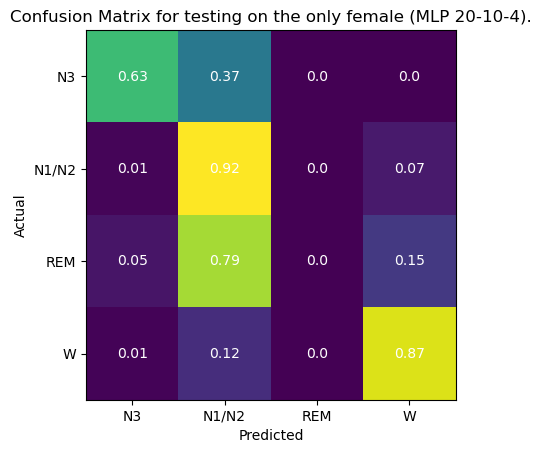

In [52]:
# Confusion matrix for all 10 splits
from utils import accuracy_metrics
title='Confusion Matrix for testing on the only female (MLP 20-10-4).'
total_confusion = sum(confusions)
total_confusion


plot_norm_confusion(confusions[4], title)

accuracy_metrics(confusions[4])

In [2]:
from scripts import TrainMLP, AdamConfig, SGDConfig
from src.models import MLP1, MLP2
import matplotlib.pyplot as plt
# Comparing 20-10-4 and 20-10-10-4 MLPs

patients = {"train": [1, 2, 3, 4, 5, 6, 7],
            "val":   [8, 9],
            "test":  [10]}

config = AdamConfig()

trainer1 = TrainMLP(patients=patients, model=MLP1, optimiser_config=config)
trainer1.train(n_epochs=40, print_losses=True)
trainer1.save_best_model()
trainer1.evaluate_accuracy()

trainer2 = TrainMLP(patients=patients, model=MLP2, optimiser_config=config)
trainer2.train(n_epochs=40, print_losses=True)
trainer2.save_best_model()
trainer2.evaluate_accuracy()


C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Epoch: [0/40], Average Training Loss: [1.3967807815785993]
Epoch: [0/40], Validation Loss: [1.3734398157365861], Validation Accuracy: [0.26959005376344086]
Epoch: [1/40], Average Training Loss: [1.2318631933446516]
Epoch: [1/40], Validation Loss: [1.2114666008180188], Validation Accuracy: [0.42893145161290325]
Epoch: [2/40], Average Training Loss: [1.1233856399156894]
Epoch: [2/40], Validation Loss: [1.0826890670484113], Validation Accuracy: [0.5836693548387096]
Epoch: [3/40], Average Training Loss: [1.0112340645483362]
Epoch: [3/40], Validation Loss: [0.948677467242364], Validation Accuracy: [0.6604166666666667]
Epoch: [4/40], Average Training Loss: [0.9187074091002257]
Epoch: [4/40], Validation Loss: [0.8638772909199038], Validation Accuracy: [0.692741935483871]
Epoch: [5/40], Average Training Loss: [0.8510796141903303]
Epoch: [5/40], Validation Loss: [0.8171598983387793], Validation Accuracy: [0.6926747311827957]
Epoch: [6/40], Average Training Loss: [0.8013090017246224]
Epoch: [6/4

C:\Users\Alex\PycharmProjects\4YP\src\datasets\isruc_dataset.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  features = torch.tensor(features, dtype=torch.float32)


Epoch: [0/40], Average Training Loss: [1.5208994679980807]
Epoch: [0/40], Validation Loss: [1.4596741507130284], Validation Accuracy: [0.27268145161290325]
Epoch: [1/40], Average Training Loss: [1.290662764108669]
Epoch: [1/40], Validation Loss: [1.228027912878221], Validation Accuracy: [0.5912298387096774]
Epoch: [2/40], Average Training Loss: [1.1431929859501577]
Epoch: [2/40], Validation Loss: [1.0558504827560917], Validation Accuracy: [0.5912298387096774]
Epoch: [3/40], Average Training Loss: [1.0024636095030266]
Epoch: [3/40], Validation Loss: [0.9274800180667832], Validation Accuracy: [0.6124663978494624]
Epoch: [4/40], Average Training Loss: [0.899259326750772]
Epoch: [4/40], Validation Loss: [0.8570114361542848], Validation Accuracy: [0.6660282258064517]
Epoch: [5/40], Average Training Loss: [0.8088880923756382]
Epoch: [5/40], Validation Loss: [0.8055159888801074], Validation Accuracy: [0.6826612903225807]
Epoch: [6/40], Average Training Loss: [0.7460603853415327]
Epoch: [6/40]

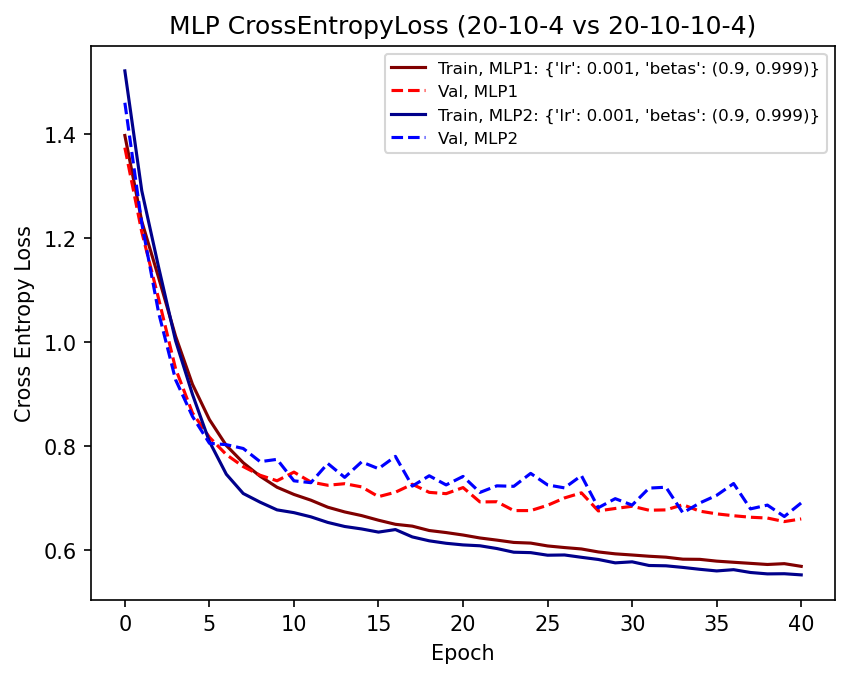

In [6]:
# Plot losses for different depth MLPs
# Compare loss plots for different optimisers
fig, ax = plt.subplots()
t_colours=['maroon','darkblue']
v_colours=['red','blue']

mlp1_labels = {"t": f"Train, MLP1: {trainer1.optimiser_config.params}",
             "v": "Val, MLP1"}
mlp2_labels = {"t": f"Train, MLP2: {trainer2.optimiser_config.params}",
              "v": "Val, MLP2"}
trainer1.plot_loss(ax=ax, t_colour=t_colours[0], v_colour=v_colours[0], labels=mlp1_labels)
trainer2.plot_loss(ax=ax, t_colour=t_colours[1], v_colour=v_colours[1], labels=mlp2_labels)

ax.set_title('MLP CrossEntropyLoss (20-10-4 vs 20-10-10-4)')



fig.dpi=150
plt.show()

In [3]:
# Investigating the effect of Resampling REM
patients = {"train": [1,2,3,4,5,6,7],
           "val": [8,9],
           "test": [10]}
resample = {"2": 5} # Resample REM by a chosen factor.

data_config = ISRUCConfig(patients=patients, resample=resample)
optimiser_config = AdamConfig()

trainer=TrainMLP(data_config=data_config, optimiser_config=optimiser_config, model=MLP1)

trainer.train(n_epochs=1, print_losses=True)

trainer.evaluate_accuracy()
confusion=trainer.confusion



Epoch: [0/1], Average Training Loss: [1.3366976106489026]
Epoch: [0/1], Validation Loss: [1.4797171796521833], Validation Accuracy: [0.11290322580645161]
Confusion matrix: 
[[  0.   0. 112.   0.]
 [  0.   0. 402.   0.]
 [  0.   0. 135.   0.]
 [  0.   0. 146.   0.]]
Accuracy metrics: 
{'TPR': array([0., 0., 1., 0.]), 'TNR': array([1., 1., 0., 1.]), 'PPV': array([       nan,        nan, 0.16981132,        nan]), 'NPV': array([0.8591195 , 0.49433962,        nan, 0.8163522 ]), 'FPR': array([0., 0., 1., 0.]), 'FNR': array([1., 1., 0., 1.]), 'FDR': array([       nan,        nan, 0.83018868,        nan]), 'ACC': array([0.8591195 , 0.49433962, 0.16981132, 0.8163522 ])}


C:\Users\Alex\PycharmProjects\4YP\utils\accuracy_metrics.py:16: RuntimeWarning: invalid value encountered in divide
  PPV = TP / (TP + FP)
C:\Users\Alex\PycharmProjects\4YP\utils\accuracy_metrics.py:18: RuntimeWarning: invalid value encountered in divide
  NPV = TN / (TN + FN)
C:\Users\Alex\PycharmProjects\4YP\utils\accuracy_metrics.py:24: RuntimeWarning: invalid value encountered in divide
  FDR = FP / (TP + FP)


[[ 93.  18.   1.   0.]
 [ 10.  84. 247.  61.]
 [  2.  15. 118.   0.]
 [  5.   2.  21. 118.]]


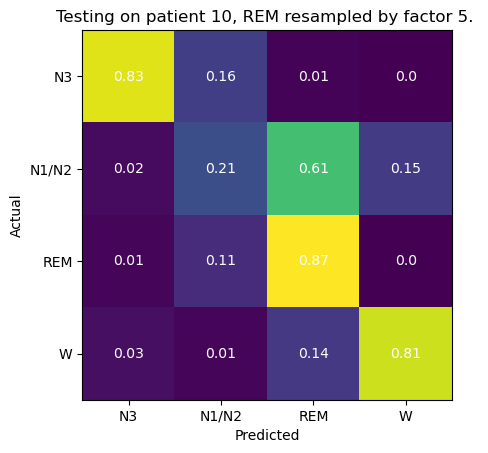

In [5]:
plot_norm_confusion(confusion, f"Testing on patient 10, REM resampled by factor {resample['2']}. ")

{'train': [2, 3, 4, 5, 6, 7], 'val': [9, 10], 'test': [1]}
Confusion matrix: 
[[127.  41.   0.   0.]
 [ 30. 365.  49.  21.]
 [  0.  34.  71.   1.]
 [  0.   7.   7. 124.]]
Accuracy metrics: 
{'TPR': array([0.75595238, 0.78494624, 0.66981132, 0.89855072]), 'TNR': array([0.95768688, 0.80097087, 0.92736706, 0.97023004]), 'PPV': array([0.8089172 , 0.81655481, 0.55905512, 0.84931507]), 'NPV': array([0.94305556, 0.76744186, 0.95333333, 0.98084815]), 'FPR': array([0.04231312, 0.19902913, 0.07263294, 0.02976996]), 'FNR': array([0.24404762, 0.21505376, 0.33018868, 0.10144928]), 'FDR': array([0.1910828 , 0.18344519, 0.44094488, 0.15068493]), 'ACC': array([0.91904219, 0.79247434, 0.89623717, 0.95895097])}
{'train': [3, 4, 5, 6, 7, 8], 'val': [10, 1], 'test': [2]}
Confusion matrix: 
[[175.  12.   2.   0.]
 [ 75. 233.  90.   5.]
 [ 11.  51.  89.   1.]
 [  0.   5.  13.  68.]]
Accuracy metrics: 
{'TPR': array([0.92592593, 0.57816377, 0.58552632, 0.79069767]), 'TNR': array([0.86583463, 0.84074941, 0.84

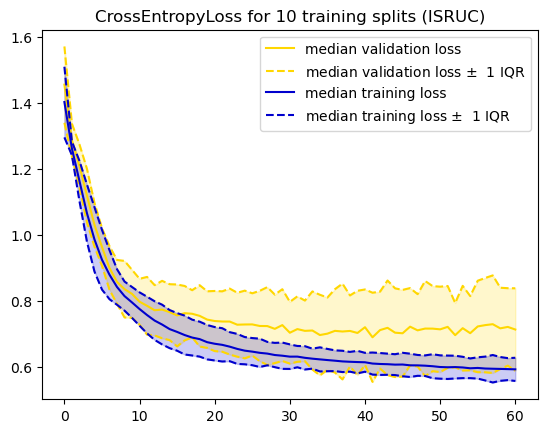

In [4]:
# Testing resampling for all 10 splits:

p = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # Used to iterate through different splits.
confusions=[]
VLs=[]
TLs=[]


optimiser_config=AdamConfig()

for test_patient in range(len(p)):
    # Wrap-around for training patients
    train_start = (test_patient - 9) % len(p)
    train_end = (test_patient - 3) % len(p)
    if train_start < train_end:
        train_patients = list(p[train_start:train_end])
    else:
        train_patients = list(p[train_start:]) + list(p[:train_end])

    # Wrap-around for validation patients
    val_start = (test_patient - 2) % len(p)
    val_end = test_patient % len(p)
    if val_start < val_end:
        val_patients = list(p[val_start:val_end])
    else:
        val_patients = list(p[val_start:]) + list(p[:val_end])

    test_patients = [p[test_patient]]

    patients = {"train": train_patients, "val": val_patients, "test": test_patients}
    print(patients)    
    resample = {"2": 2.73} # Resample factor chosen to bring REM up to the same proportion as N1/N2
                            # This resample factor is the same for each split, but on average across all splits W and REM will be the same proportion.
    data_config = ISRUCConfig(patients=patients, resample=resample)
    optimiser_config
    
    
    trainer = TrainMLP(data_config=data_config, optimiser_config=optimiser_config, model=MLP1)
    trainer.train(n_epochs=60, print_losses=False)
    trainer.test()
    VLs.append(trainer.VL)
    TLs.append(trainer.TL)
    confusions.append(trainer.confusion)
    
plot_losses(VLs, TLs, title="CrossEntropyLoss for 10 training splits (ISRUC)")


[[1433.  370.   33.    4.]
 [ 410. 2250.  791.  199.]
 [  28.  351.  652.   30.]
 [  14.  160.  112. 1375.]]


{'TPR': array([0.77880435, 0.61643836, 0.61451461, 0.82781457]),
 'TNR': array([0.92906466, 0.80688295, 0.86910922, 0.96443291]),
 'PPV': array([0.7602122 , 0.71862025, 0.41057935, 0.8550995 ]),
 'NPV': array([0.93567251, 0.72446369, 0.93825483, 0.95669291]),
 'FPR': array([0.07093534, 0.19311705, 0.13089078, 0.03556709]),
 'FNR': array([0.22119565, 0.38356164, 0.38548539, 0.17218543]),
 'FDR': array([0.2397878 , 0.28137975, 0.58942065, 0.1449005 ]),
 'ACC': array([0.89539698, 0.72223575, 0.83621529, 0.93679981])}

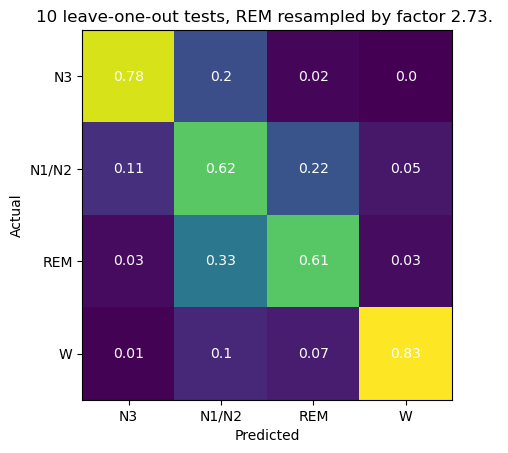

In [10]:
plot_norm_confusion(sum(confusions), f"10 leave-one-out tests, REM resampled by factor {resample['2']}. ")
accuracy_metrics(sum(confusions))

In [3]:
# Training the MLP on SHHS data

split = {"train": 350,
         "val":   150,
         "test":  50}

data_config = SHHSConfig_f(split=split)
optimiser_config = AdamConfig(lr=0.00005)

trainer = TrainMLP(data_config=data_config, optimiser_config=optimiser_config, model=MLP1)
trainer.train(n_epochs=1, print_losses=True)
trainer.test()
plot_norm_con

AttributeError: 'TrainMLP' object has no attribute 'train_dataset'